In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler    
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import feature_selection
from sklearn.ensemble import RandomForestClassifier


In [3]:
data=pd.read_csv('S:/Sem 3/Multivariate Statistics/Assignments/Final project/surface_faults.csv')
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [22]:
X=data.drop(data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']], axis=1)
# y_col= data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]
y=(data.iloc[:,-7:]==1).idxmax(1)
y.shape
X.shape
# X['Y_Minimum'] = X['Y_Minimum']/10000
# X['Y_Minimum'] = X['Y_Minimum']/10000
# X['Y_Minimum'] = X['Y_Minimum']/10000
# (X[['Y_Minimum','Y_Maximum']]/10000).describe()

(1941, 27)

## Standardizing the features


In [31]:
scalar= StandardScaler()
scalar.fit(data)

StandardScaler()

In [35]:
features = data.columns

data[features] = scalar.transform(data[features])

data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,-1.099117,-1.244436,-0.930424,-0.930449,-0.366585,-0.372496,-0.194800,-0.402827,-2.640067,-7.030942,...,2.764650,-6.350138,-1.753013,11.987128,-1.437917,-1.754511,-1.234797,-1.199932,-1.772294,-2.259288
1,-1.096892,-1.242008,-0.930424,-0.930448,-0.366591,-0.372573,-0.194877,-0.402827,-2.632316,-6.987983,...,2.664546,-1.119618,-4.217236,11.987128,-1.437917,-1.754511,-1.234797,-1.199932,-1.772294,-2.259288
2,-1.096213,-1.241265,-0.930424,-0.930448,-0.366593,-0.372595,-0.194937,-0.402827,-2.617782,-6.982256,...,2.160437,1.267343,-4.941394,11.987128,-1.437917,-1.754511,-1.234797,-1.199932,-1.772294,-2.259288
3,-1.096124,-1.241164,-0.930424,-0.930449,-0.366589,-0.372540,-0.194794,-0.402827,-2.617782,-6.979392,...,2.869140,-0.269715,-2.282673,11.987128,-1.437917,-1.754511,-1.234797,-1.199932,-1.772294,-2.259288
4,-1.094515,-1.239362,-0.930424,-0.930449,-0.366505,-0.372022,-0.193612,-0.402826,-2.677855,-6.979392,...,3.225686,-2.186518,1.874726,11.987128,-1.437917,-1.754511,-1.234797,-1.199932,-1.772294,-2.259288


In [36]:
# sns.pairplot(data,x_vars=X,
#     y_vars=y)
data_new=data.drop(data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']], axis=1)
le=LabelEncoder()
data_new['defect_type']=le.fit_transform(y)
data_new

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,defect_type
0,-1.099117,-1.244436,-0.930424,-0.930449,-0.366585,-0.372496,-0.194800,-0.402827,-2.640067,-7.030942,...,-4.875781,-0.072886,0.630552,-3.265930,-4.640043,-1.925022,2.764650,-6.350138,-1.753013,4
1,-1.096892,-1.242008,-0.930424,-0.930448,-0.366591,-0.372573,-0.194877,-0.402827,-2.632316,-6.987983,...,-2.688240,-0.679931,0.630552,-3.897833,-5.178800,-2.802771,2.664546,-1.119618,-4.217236,4
2,-1.096213,-1.241265,-0.930424,-0.930448,-0.366593,-0.372595,-0.194937,-0.402827,-2.617782,-6.982256,...,-0.152450,-1.031763,0.630552,-4.190556,-5.178800,-3.806536,2.160437,1.267343,-4.941394,4
3,-1.096124,-1.241164,-0.930424,-0.930449,-0.366589,-0.372540,-0.194794,-0.402827,-2.617782,-6.979392,...,-3.727914,-0.072886,0.630552,-3.556885,-4.890226,-1.878008,2.869140,-0.269715,-2.282673,4
4,-1.094515,-1.239362,-0.930424,-0.930449,-0.366505,-0.372022,-0.193612,-0.402826,-2.677855,-6.979392,...,-8.042137,-0.282526,0.630552,-1.730299,-3.227803,1.789539,3.225686,-2.186518,1.874726,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-1.098353,-1.243519,-0.930424,-0.930449,-0.366585,-0.372088,-0.194921,-0.402827,-2.598404,-6.936433,...,-4.066019,-5.044096,-3.669717,-3.250338,-2.293067,-4.054690,-2.207841,6.936377,-0.509614,3
1937,-1.098741,-1.243931,-0.930424,-0.930449,-0.366585,-0.372198,-0.194910,-0.402827,-2.605186,-6.959344,...,-0.919949,-5.390459,-3.669717,-3.215455,-2.102411,-3.926736,-2.299569,4.187755,0.288350,3
1938,-1.098737,-1.243935,-0.930424,-0.930449,-0.366584,-0.372242,-0.194921,-0.402827,-2.597435,-6.939297,...,-0.575082,-5.873543,-3.669717,-3.203399,-2.227502,-4.190400,-2.424001,7.053917,-0.661566,3
1939,-1.098766,-1.243952,-0.930424,-0.930449,-0.366580,-0.371613,-0.194783,-0.402827,-2.600341,-6.939297,...,-7.080228,-6.278240,-3.669717,-2.951345,-1.985515,-2.662215,-0.740182,6.045788,1.804394,3


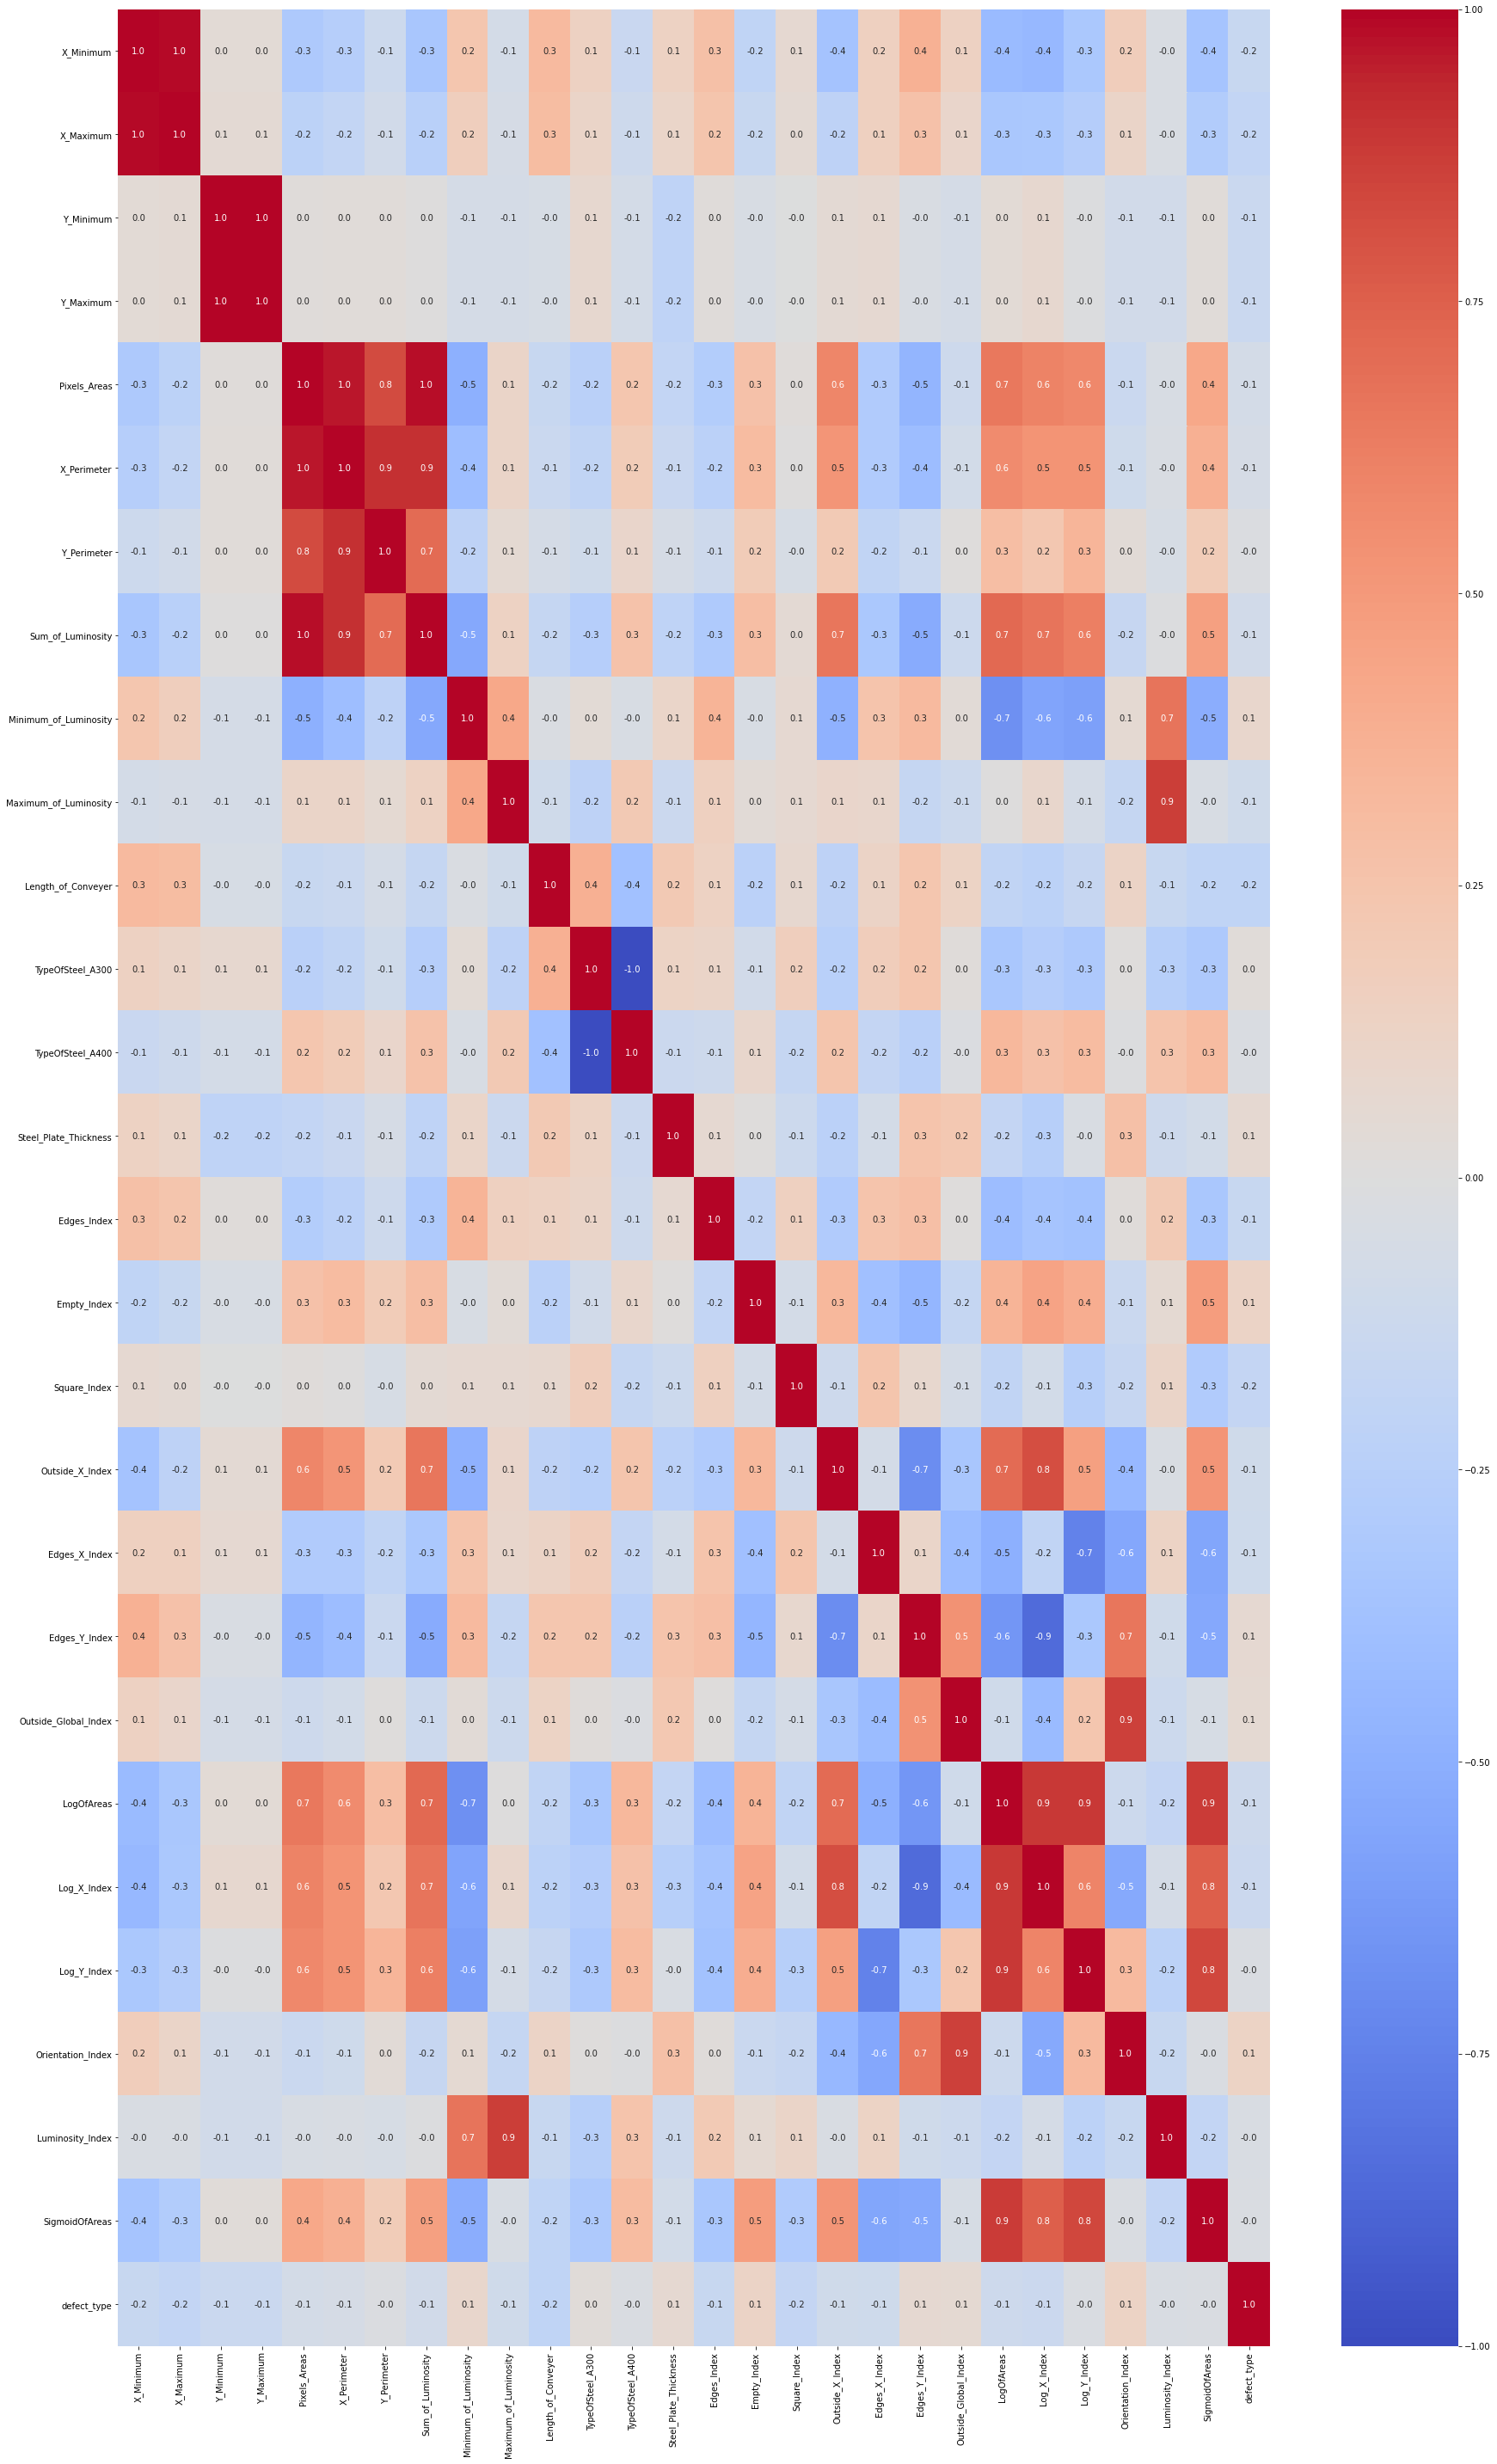

In [41]:
plt.figure(figsize=(30,50))
sns.heatmap(data_new.corr(), annot = True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.show()

In [42]:
describe=data_new.describe().T
describe['Skew']= data_new.skew().values
describe['Kurtosis']= data_new.kurt().values
print(data_new['defect_type'].describe())
describe

count    1941.000000
mean        2.569809
std         1.762407
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: defect_type, dtype: float64


,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
X_Minimum,1941.0,-1.097164,1.921516e-03,-1.099272,-1.099084,-1.097667,-1.095386,-1.092980,0.500897,-1.145143
X_Maximum,1941.0,-1.242142,2.010571e-03,-1.244622,-1.243863,-1.242752,-1.240307,-1.237717,0.524210,-1.077525
Y_Minimum,1941.0,-0.930424,5.638046e-07,-0.930424,-0.930424,-0.930424,-0.930424,-0.930420,0.000000,11.357575
Y_Maximum,1941.0,-0.930448,5.638009e-07,-0.930449,-0.930449,-0.930448,-0.930448,-0.930445,0.000000,11.357194
Pixels_Areas,1941.0,-0.366524,1.935810e-04,-0.366595,-0.366592,-0.366589,-0.366565,-0.360878,14.083822,375.838204
X_Perimeter,1941.0,-0.371450,3.321663e-03,-0.372661,-0.372518,-0.372396,-0.371757,-0.257454,21.539451,715.956548
Y_Perimeter,1941.0,-0.194585,2.345969e-03,-0.195036,-0.194970,-0.194904,-0.194585,-0.095193,39.293158,1663.051848
Sum_of_Luminosity,1941.0,-0.402826,1.953012e-06,-0.402827,-0.402827,-0.402827,-0.402827,-0.402783,7.730720,131.495265
Minimum_of_Luminosity,1941.0,-2.631784,3.113546e-02,-2.713705,-2.652663,-2.626502,-2.611000,-2.517015,-0.107098,0.112370
Maximum_of_Luminosity,1941.0,-6.967381,5.352929e-02,-7.234279,-6.985119,-6.976528,-6.939297,-6.615675,1.287035,7.858420


In [43]:
print(data_new['defect_type'].value_counts())


3    673
0    402
2    391
6    190
4    158
5     72
1     55
Name: defect_type, dtype: int64


<AxesSubplot:xlabel='defect_type', ylabel='count'>

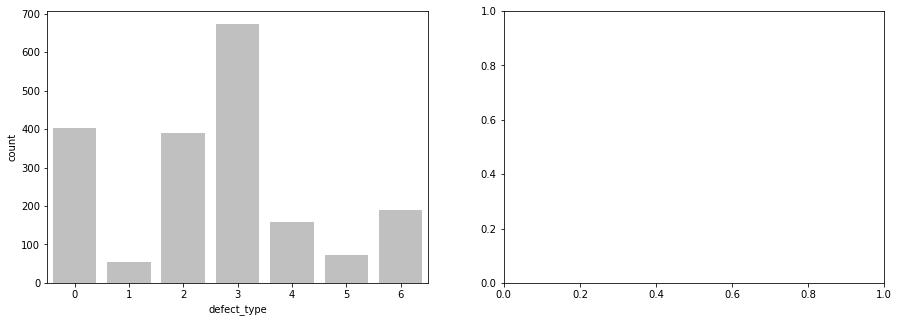

In [44]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='defect_type', data=data_new, ax=ax[0],color='silver')


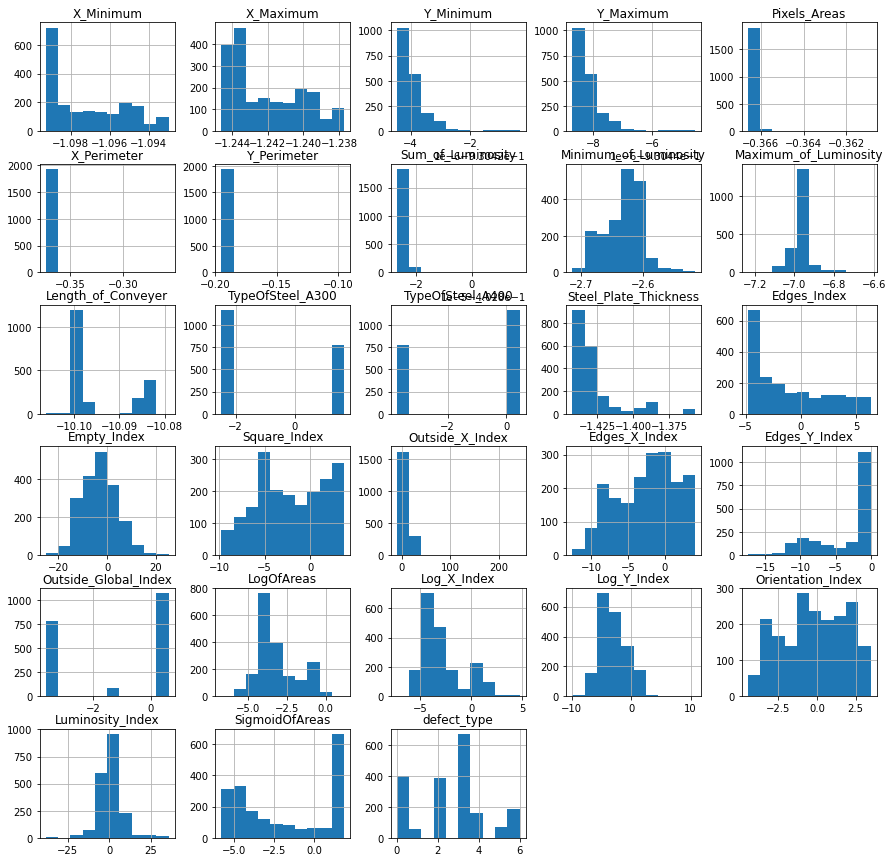

In [45]:
#box plot
data_new.hist(figsize=(15,15))
plt.show()

In [46]:
data_new.columns
data_new.defect_type

0       4
1       4
2       4
3       4
4       4
       ..
1936    3
1937    3
1938    3
1939    3
1940    3
Name: defect_type, Length: 1941, dtype: int32

In [47]:
data_new['defect_type']

0       4
1       4
2       4
3       4
4       4
       ..
1936    3
1937    3
1938    3
1939    3
1940    3
Name: defect_type, Length: 1941, dtype: int32

In [48]:
le=LabelEncoder()
X=data_new.drop('defect_type',axis=1)
Y=le.fit_transform(data_new['defect_type'])
data_new

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,defect_type
0,-1.099117,-1.244436,-0.930424,-0.930449,-0.366585,-0.372496,-0.194800,-0.402827,-2.640067,-7.030942,...,-4.875781,-0.072886,0.630552,-3.265930,-4.640043,-1.925022,2.764650,-6.350138,-1.753013,4
1,-1.096892,-1.242008,-0.930424,-0.930448,-0.366591,-0.372573,-0.194877,-0.402827,-2.632316,-6.987983,...,-2.688240,-0.679931,0.630552,-3.897833,-5.178800,-2.802771,2.664546,-1.119618,-4.217236,4
2,-1.096213,-1.241265,-0.930424,-0.930448,-0.366593,-0.372595,-0.194937,-0.402827,-2.617782,-6.982256,...,-0.152450,-1.031763,0.630552,-4.190556,-5.178800,-3.806536,2.160437,1.267343,-4.941394,4
3,-1.096124,-1.241164,-0.930424,-0.930449,-0.366589,-0.372540,-0.194794,-0.402827,-2.617782,-6.979392,...,-3.727914,-0.072886,0.630552,-3.556885,-4.890226,-1.878008,2.869140,-0.269715,-2.282673,4
4,-1.094515,-1.239362,-0.930424,-0.930449,-0.366505,-0.372022,-0.193612,-0.402826,-2.677855,-6.979392,...,-8.042137,-0.282526,0.630552,-1.730299,-3.227803,1.789539,3.225686,-2.186518,1.874726,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-1.098353,-1.243519,-0.930424,-0.930449,-0.366585,-0.372088,-0.194921,-0.402827,-2.598404,-6.936433,...,-4.066019,-5.044096,-3.669717,-3.250338,-2.293067,-4.054690,-2.207841,6.936377,-0.509614,3
1937,-1.098741,-1.243931,-0.930424,-0.930449,-0.366585,-0.372198,-0.194910,-0.402827,-2.605186,-6.959344,...,-0.919949,-5.390459,-3.669717,-3.215455,-2.102411,-3.926736,-2.299569,4.187755,0.288350,3
1938,-1.098737,-1.243935,-0.930424,-0.930449,-0.366584,-0.372242,-0.194921,-0.402827,-2.597435,-6.939297,...,-0.575082,-5.873543,-3.669717,-3.203399,-2.227502,-4.190400,-2.424001,7.053917,-0.661566,3
1939,-1.098766,-1.243952,-0.930424,-0.930449,-0.366580,-0.371613,-0.194783,-0.402827,-2.600341,-6.939297,...,-7.080228,-6.278240,-3.669717,-2.951345,-1.985515,-2.662215,-0.740182,6.045788,1.804394,3


In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8,random_state=1)

In [50]:
#LR
lr = sm.OLS(y_train,x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     17.04
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           5.79e-67
Time:                        18:15:56   Log-Likelihood:                -2883.9
No. Observations:                1552   AIC:                             5822.
Df Residuals:                    1525   BIC:                             5966.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
X_Minimum             -9209.8326   4723.782     -1.950      0.051   -1.85e+04      55.964
X_Maximum              8270.4069   4314.477      1.917      0.055    -192.529    1.67e+04
Y_Minimum             -1.686e+10   9.47e+09     -1.780      0.075   -3.54e+10    1.72e+09
Y_Maximum              1.685e+10   9.47e+09      1.780      0.075   -1.72e+09    3.54e+10
Pixels_Areas            835.0305   4404.650      0.190      0.850   -7804.781    9474.842
X_Perimeter             313.8338    164.320      1.910      0.056      -8.484     636.152
Y_Perimeter           -1410.2547    696.952     -2.023      0.043   -2777.341     -43.168
Sum_of_Luminosity      1.191e+05   3.78e+05      0.315      0.753   -6.23e+05    8.61e+05
Minimum_of_Luminosity    -2.7925      3.621     -0.771      0.441      -9.895       4.310
Maximum_of_Luminosity    -3.8585      1.851     -2.085      0.037      -7.489      -0.228
Length_of_Conveyer      -60.9514      8.332     -7.315      0.000     -77.294     -44.608
TypeOfSteel_A300      -1.801e+05   2.07e+05     -0.871      0.384   -5.86e+05    2.26e+05
TypeOfSteel_A400      -1.801e+05   2.07e+05     -0.871      0.384   -5.86e+05    2.26e+05
Steel_Plate_Thickness     0.7486      2.501      0.299      0.765      -4.157       5.654
Edges_Index              -0.0838      0.014     -6.161      0.000      -0.110      -0.057
Empty_Index               0.0194      0.028      0.706      0.480      -0.035       0.073
Square_Index             -0.0848      0.014     -5.851      0.000      -0.113      -0.056
Outside_X_Index          -0.1662      0.082     -2.019      0.044      -0.328      -0.005
Edges_X_Index             0.0008      0.023      0.037      0.971      -0.044       0.046
Edges_Y_Index            -0.0278      0.029     -0.972      0.331      -0.084       0.028
Outside_Global_Index     -0.1082      0.046     -2.351      0.019      -0.199      -0.018
LogOfAreas               -0.8316      1.053     -0.789      0.430      -2.898       1.235
Log_X_Index               0.0796      0.419      0.190      0.849      -0.742       0.901
Log_Y_Index              -0.1049      0.355     -0.295      0.768      -0.802       0.592
Orientation_Index         0.3267      0.123      2.647      0.008       0.085       0.569
Luminosity_Index          0.0191      0.021      0.895      0.371      -0.023       0.061
SigmoidOfAreas            0.1150      0.043      2.701      0.007       0.031       0.199
==============================================================================
Omnibus:                       35.658   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.882
Skew:                          -0.296   Prob(JB):                     1.19e-07
Kurtosis:                       2.621   Cond. No.                  

In [51]:
data_new
data_new_droped=data_new.drop(['defect_type','X_Maximum','X_Perimeter','Luminosity_Index','Log_Y_Index','Log_X_Index','LogOfAreas','Edges_Y_Index','Edges_X_Index','Empty_Index'
                              ,'Steel_Plate_Thickness','Minimum_of_Luminosity','Sum_of_Luminosity','Pixels_Areas'],axis=1)
X1=data_new_droped
Y1=data_new['defect_type']

In [52]:
X1.columns

Index(['X_Minimum', 'Y_Minimum', 'Y_Maximum', 'Y_Perimeter',
       'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Edges_Index', 'Square_Index', 'Outside_X_Index',
       'Outside_Global_Index', 'Orientation_Index', 'SigmoidOfAreas'],
      dtype='object')

In [53]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2 )
clf_fit=knn.fit(x_train, y_train)
# kn_scores=clf_fit.score(x_test, y_test)
y_pred=knn.predict(x_test)


In [54]:
knn.predict(x_test)

array([0, 2, 0, 0, 3, 0, 0, 3, 0, 3, 4, 0, 0, 3, 2, 2, 3, 0, 2, 0, 4, 3,
       3, 5, 4, 2, 2, 4, 2, 0, 3, 3, 3, 2, 5, 0, 0, 6, 5, 0, 3, 4, 3, 2,
       0, 0, 6, 6, 2, 5, 3, 3, 3, 6, 2, 6, 3, 0, 3, 4, 3, 3, 0, 6, 5, 3,
       2, 0, 0, 2, 0, 0, 2, 0, 3, 3, 1, 3, 6, 6, 0, 2, 3, 3, 3, 5, 4, 3,
       2, 6, 0, 2, 0, 3, 2, 3, 2, 3, 0, 0, 4, 2, 3, 3, 3, 4, 2, 2, 3, 0,
       3, 3, 3, 3, 0, 2, 3, 0, 0, 0, 3, 2, 1, 0, 0, 3, 6, 6, 2, 2, 0, 3,
       3, 3, 2, 2, 5, 0, 2, 2, 2, 2, 3, 2, 0, 2, 3, 3, 5, 0, 5, 3, 3, 5,
       0, 3, 0, 0, 2, 0, 0, 2, 5, 3, 3, 2, 2, 3, 0, 2, 2, 0, 6, 3, 1, 3,
       2, 3, 0, 6, 6, 2, 4, 3, 2, 3, 3, 2, 4, 3, 2, 3, 0, 2, 0, 3, 3, 6,
       0, 6, 1, 3, 6, 3, 6, 0, 0, 5, 0, 3, 6, 2, 3, 0, 0, 2, 0, 6, 2, 3,
       0, 6, 3, 0, 0, 2, 5, 4, 0, 0, 3, 1, 1, 0, 3, 3, 0, 3, 2, 0, 3, 0,
       2, 4, 3, 3, 6, 6, 3, 6, 0, 3, 2, 3, 3, 6, 3, 3, 2, 3, 3, 0, 3, 2,
       3, 6, 3, 0, 0, 5, 0, 2, 0, 3, 3, 0, 2, 0, 4, 2, 0, 1, 3, 0, 0, 3,
       0, 3, 1, 2, 0, 2, 6, 3, 6, 0, 3, 0, 3, 6, 0,

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
print('\nclassification_report\n',classification_report(y_test, y_pred))


Accuracy: 0.5938303341902313

classification_report
               precision    recall  f1-score   support

           0       0.42      0.54      0.48        79
           1       0.50      0.50      0.50        10
           2       0.92      0.91      0.92        80
           3       0.60      0.54      0.57       138
           4       0.48      0.34      0.40        29
           5       0.76      1.00      0.87        13
           6       0.35      0.33      0.34        40

    accuracy                           0.59       389
   macro avg       0.58      0.59      0.58       389
weighted avg       0.60      0.59      0.59       389



In [58]:
cross_val_score(knn, X, y, cv=10).mean()

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn, X,Y, cv=10)
    
    print('k:',k, ': mean accuracy:', score.mean(),':std:',score.std() )
    

k: 1 : mean accuracy: 0.5266270155960877 :std: 0.0689238091050636
k: 3 : mean accuracy: 0.5446444620671425 :std: 0.07679179793315435
k: 5 : mean accuracy: 0.5472006344171293 :std: 0.06710724867200223
k: 7 : mean accuracy: 0.5549193761564896 :std: 0.06715601175759879
k: 9 : mean accuracy: 0.5652418715305313 :std: 0.08823936132937904
k: 11 : mean accuracy: 0.5621543748347871 :std: 0.08883121379067303
k: 13 : mean accuracy: 0.5657705524715834 :std: 0.09396023016309397
k: 15 : mean accuracy: 0.5637139836108908 :std: 0.0976410037152258
k: 17 : mean accuracy: 0.5714380121596616 :std: 0.10114664797956392
k: 19 : mean accuracy: 0.5631932328839545 :std: 0.09710440681641032


In [60]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[43,  0,  0, 21,  1,  0, 14],
       [ 1,  5,  0,  3,  1,  0,  0],
       [ 1,  0, 73,  5,  0,  1,  0],
       [37,  3,  5, 74,  7,  3,  9],
       [ 9,  2,  0,  7, 10,  0,  1],
       [ 0,  0,  0,  0,  0, 13,  0],
       [11,  0,  1, 13,  2,  0, 13]], dtype=int64)

In [61]:
# random forest
rfc = RandomForestClassifier(n_estimators=30, random_state=68, max_depth = 10)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)
print('The training accuracy of the model is {}'.format(accuracy_score(y_train,y_pred_train)))
print('The testing accuracy of the model is {}'.format(accuracy_score(y_test,y_pred_rfc)))

The training accuracy of the model is 0.9323453608247423
The testing accuracy of the model is 0.7532133676092545


In [62]:
print(metrics.classification_report(y_test,y_pred_rfc ))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63        79
           1       0.89      0.80      0.84        10
           2       0.99      0.90      0.94        80
           3       0.65      0.75      0.70       138
           4       0.78      0.48      0.60        29
           5       1.00      1.00      1.00        13
           6       0.89      0.82      0.86        40

    accuracy                           0.75       389
   macro avg       0.83      0.77      0.79       389
weighted avg       0.77      0.75      0.75       389



In [63]:
#Confusion matrix
confusion_matrix(y_test,y_pred_rfc)

array([[ 50,   0,   0,  28,   1,   0,   0],
       [  1,   8,   0,   1,   0,   0,   0],
       [  0,   0,  72,   8,   0,   0,   0],
       [ 26,   1,   1, 103,   3,   0,   4],
       [  4,   0,   0,  11,  14,   0,   0],
       [  0,   0,   0,   0,   0,  13,   0],
       [  0,   0,   0,   7,   0,   0,  33]], dtype=int64)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, train_size = 0.8,random_state=1)

In [65]:
#KNN for selected features
#KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2 )
clf_fit=knn.fit(x_train, y_train)
# kn_scores=clf_fit.score(x_test, y_test)
y_pred=knn.predict(x_test)

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
print('\nclassification_report\n',classification_report(y_test, y_pred))


Accuracy: 0.5784061696658098

classification_report
               precision    recall  f1-score   support

           0       0.41      0.52      0.46        79
           1       0.56      0.50      0.53        10
           2       0.88      0.85      0.87        80
           3       0.59      0.55      0.57       138
           4       0.42      0.34      0.38        29
           5       0.63      0.92      0.75        13
           6       0.41      0.33      0.36        40

    accuracy                           0.58       389
   macro avg       0.56      0.57      0.56       389
weighted avg       0.58      0.58      0.58       389



In [67]:
# random forest for selected features
rfc = RandomForestClassifier(n_estimators=30, random_state=68, max_depth = 10)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)
print('The training accuracy of the model is {}'.format(accuracy_score(y_train,y_pred_train)))
print('The testing accuracy of the model is {}'.format(accuracy_score(y_test,y_pred_rfc)))

The training accuracy of the model is 0.9342783505154639
The testing accuracy of the model is 0.7455012853470437
